# ECS7024 Statistics for Artificial Intelligence and Data Science

## Coursework 2

The overall aim of this notebook is to provide sufficient solution to Coursework 2.

## Table of Contents

- [Section 1: Introducing the Data Set](#section-1-introducing-the-data-set)
  - [Section 1.1 The Variables](#section-11-the-variables)
  - [Section 1.2 Loading the Data](#section-12-loading-the-data)
  - [Section 1.3 Derive the Intended Variables](#section-13-derive-the-intended-variables)
  - [Section 1.4 Data Preparation](#section-14-data-preparation)
- [Section 2: Exploratory Analysis](#section-2-exploratory-analysis)
  - [Section 2.1 Relationship between Predictor Variables](#section-21-relationship-between-predictor-variables)
    - [Section 2.1.1 Relationship between Continuous Variables](#section-211-relationship-between-continuous-variables)
    - [Section 2.1.2 Relationship between Categorical Variables](#section-212-relationship-between-categorical-variables)
    - [Section 2.1.3 Relationship between Categorical and Continuous Variable](#section-213-relationship-between-categorical-and-continuous-variable)
  - [Section 2.2 Relationship between a Predictor Variable and the Target Variable](#section-22-relationship-between-a-predictor-variable-and-the-target-variable)
    - [Section 2.2.1 Current Condition and Age](#section-221-current-condition-and-age)
    - [Section 2.2.2 Current Condition and Average Use](#section-222-current-condition-and-average-use)
    - [Section 2.2.3 Current Condition and Percent Trucks](#section-223-current-condition-and-percent-trucks)
    - [Section 2.2.4 Current Condition and Material](#section-224-current-condition-and-material)
    - [Section 2.2.5 Current Condition and Design](#section-225-current-condition-and-design)
  - [Section 2.3 Preliminary Conclusions](#section-23-preliminary-conclusions)
- [Section 3: Regression Modeling](#section-3-regression-modeling)
  - [Section 3.1 Preparation](#section-31-preparation)
  - [Section 3.2 Fitting the Regression Line](#section-32-fitting-the-regression-line)
  - [Section 3.3 Interpretation of Results](#section-33-interpretation-of-results)
  - [Section 3.4 Standardization and Influence Comparison for Predictors](#section-34-standardization-and-influence-comparison-for-predictors)
  - [Section 3.5 Conclusion](#section-35-conclusion)
  - [Section 3.6 Further Analysis](#section-36-further-analysis)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Section 1: Introducing the Data Set

This report looks at some data from the US National Bridge Inspection maintained by the Federal Highways Agency (FHWA), part of the US Department of Transportation. The original data comes from the National Bridge Inspection section of the FHWA's web site. However, it has been greatly simplified.

### Section 1.1 The Variables
The original FHWA dataset has over 100 variables (Texas collects even more); ours is simplified. Both continuous and categorical variables are included. The next table presents an example of variables, their description and their respective type.


| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|Year           | The year the bridge was built                             | continuous | 
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Deck_rating    | The condition of the deck of the bridge                   | ordinal |
|Superstr_rating| The condition of the bridge superstructure                | ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | ordinal |
|Historic       | Whether the bridge is historic                            | category |

 
**Values of Categorical Variables** In the original data, the values of the categorical variables are represented as integers, with their meanings given in a data dictionary. In our dataset, these 'numeric codes' have been replaced with suitable names.

| Variable      |      Values            |
|:--------------|:-----------------------|
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed  
|Substr_rating  | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed 
|Historic       | Register, Possible, Unknown, Not historic |


### Section 1.2 Loading the Data

We load the data from the CSV file: tx19_bridges_sample.csv. A 'type map' is used to set the types of each variable. We represent the variables as Categorical Variables: using type category gives the default behaviour (use each unique value as a category, and categories are not ordered). However, for the ordinal variables (categorical variables with an order), we declare a suitable type explicitly.   

In [3]:
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

types_dict = {'Material':'category', 'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type
              }
             
bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict)
bridges 

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,2,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300


In [4]:
bridges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34293 entries, 0 to 34292
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Structure_id     34293 non-null  object  
 1   District         34293 non-null  object  
 2   Detour_Km        34293 non-null  int64   
 3   Toll             34293 non-null  object  
 4   Maintainer       34293 non-null  object  
 5   Urban            34293 non-null  object  
 6   Status           34293 non-null  object  
 7   Year             34293 non-null  int64   
 8   Lanes_on         34293 non-null  int64   
 9   Lanes_under      34293 non-null  int64   
 10  AverageDaily     34293 non-null  int64   
 11  Historic         34293 non-null  object  
 12  Service_under    34293 non-null  object  
 13  Material         34293 non-null  category
 14  Design           34293 non-null  category
 15  Spans            34293 non-null  int64   
 16  Length           34293 non-null  float64

### Section 1.3 Derive the intended variables from the given data

**The aim of this report is to investigate the use of the following variables to predict the current condition of bridges in the state of Texas:**

* Age (derived from variable Year)
* Average use (variable AverageDaily)
* Percent trucks (variable Trucks_percent)
* Material (variable Material)
* Design (variable Design)

**The current condition is derived from the variables:**
* Deck_rating
* Superstr_rating
* Substr_rating

As such, to derive the variables above, we create a new data frame, TexasBridges, with the following variables from our initial data set.

In [3]:
columns_to_select = [
    'Year',
    'AverageDaily',
    'Trucks_percent',
    'Material',
    'Design',
    'Deck_rating',
    'Superstr_rating',
    'Substr_rating',
    'Historic'
    ]

TexasBridges = bridges[columns_to_select]
TexasBridges

,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Historic
0,2005,1,0.0,Concrete,Slab,Good,Very Good,Very Good,Not historic
1,2005,1,0.0,Concrete,Slab,Good,Good,Very Good,Not historic
2,2012,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,Not historic
3,1950,80,0.0,Timber,Beam,Good,Good,Poor,Not historic
4,2004,150,4.0,Concrete,Beam,Good,Very Good,Very Good,Not historic
...,...,...,...,...,...,...,...,...,...
34288,1994,300,40.0,Concrete,Beam,Good,Good,Good,Not historic
34289,2000,300,40.0,Concrete,Beam,Good,Good,Good,Not historic
34290,1996,1200,25.0,Concrete,Beam,Good,Good,Good,Not historic
34291,1991,300,15.0,Concrete,Beam,Good,Good,Satisfactory,Not historic


### Section 1.4 Data Preparation

* **Average use and Percent trucks**

We rename the variables as per the suggestion from the management of Texas Department of Transportation:

variable Average use from the variable AverageDaily
<br>
variable Percent trucks from the variable Trucks_percent

In [4]:
TexasBridges = TexasBridges.rename(columns={'AverageDaily': 'Average use', 'Trucks_percent': 'Percent trucks'})

* **Age**

We derive the new variable Age as the current year (2023) minus the variable Year (the year the bridge was built)

In [5]:
#the below is to avoid the following error: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
TexasBridges = TexasBridges.copy()

TexasBridges['Age'] = 2023 - TexasBridges['Year']

We have been recommended to exclude very old bridges.
<br>
We have been recommended to exclude very old bridges.
To better understand which bridges could be considered very old, we create a histogram to visualise the distribution of the Age variable, available in Fig. 1.
<br>
And we generate the statistics of the distribution.

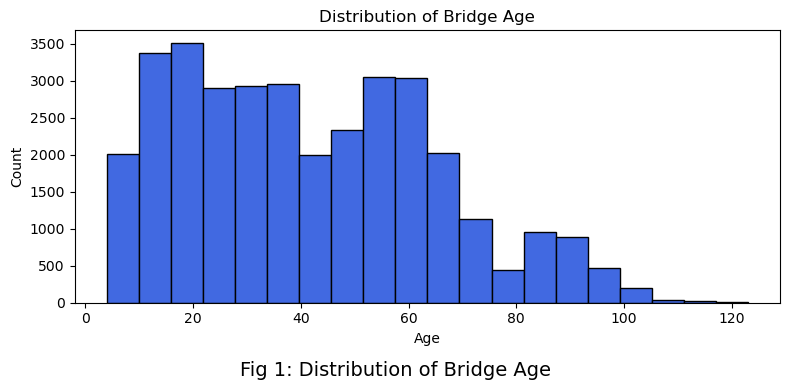

,Age Statistics
count,34293.000000
mean,41.502581
std,23.860135
min,4.000000
25%,21.000000
50%,38.000000
75%,59.000000
max,123.000000


In [6]:
plt.figure(figsize=(8, 4))
plt.hist(TexasBridges['Age'], bins=20, color='royalblue', edgecolor='black')
plt.title('Distribution of Bridge Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Fig 1: Distribution of Bridge Age', fontsize=14, y=0)
plt.tight_layout()
plt.show()

proportion_stats_df = pd.DataFrame(TexasBridges['Age'].describe())
proportion_stats_df.columns = ['Age Statistics']
proportion_stats_df

The total number of bridges is 34,293. <br>
The mean (average) age of the bridges in the dataset is approximately 41.50 years. <br>
The standard deviation of approximately 23.86 years measures the dispersion of the bridge ages around the mean. <br>
25% of the bridges have an age of 21 years or younger. <br>
The middle value when all ages are sorted is 38 years. The median age divides the dataset into two equal halves. <br>
75% of the bridges have an age of 59 years or younger. <br>
The minimum age is 4 years.<br>
The maximum age is 123 years.

Using these statistics, we could consider a bridge to be old if it is significantly older than the average or if it exceeds the 75th percentile age.<br>
In this context, we consider bridges that are 60 years or older as **old** based on the 75th percentile. This would account for 25% of all the bridges in our data set. We consider this to be a significantly big reduction of our data set due to the small number of bridges included in the csv file (i.e. number of observations), and we would seek further analysis of what to consider very old.<br>

Determining what constitutes a **very old** bridge is somewhat subjective and may depend on various factors, including the historic and cultural value of long-standing bridges, infrastructure standards, maintenance practices, and the specific context of the bridge. Some regions might consider bridges as old as 50 years to be candidates for replacement or major renovation, while others might have longer lifespans for their bridges. It is important to consider local standards and the specific conditions of the bridges when determining whether a bridge is very old or not.

However, based on the provided dataset we would use the variable Historic to get a better sense of what might be considered a very old bridge, as historical sights are usually considered very old.<br>
We create a scatter plot in Fig. 2 to visualise the relationship between the Age of the bridges and their Historic status. <br>
And we generate summary statistics for Age based on the Historic categories.

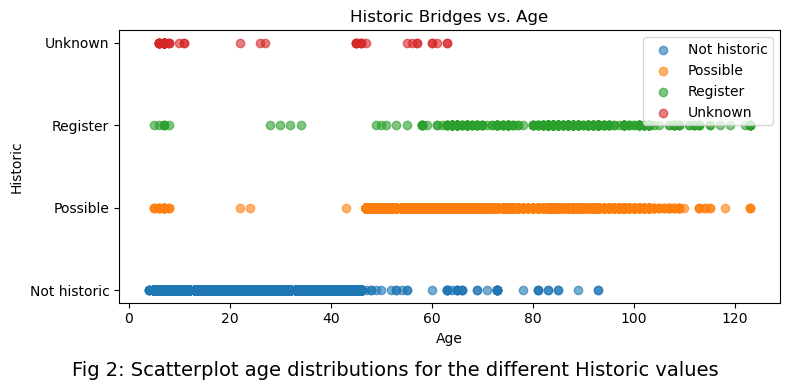

,count,mean,std,min,25%,50%,75%,max
Historic,,,,,,,,
Not historic,19912.0,24.523755,11.491238,4.0,15.0,24.0,34.0,93.0
Possible,13906.0,64.617719,14.130098,5.0,54.0,61.0,72.0,123.0
Register,417.0,84.206235,18.186154,5.0,74.0,85.0,93.0,123.0
Unknown,58.0,21.431034,21.113820,6.0,7.0,7.0,45.0,63.0


In [7]:
plt.figure(figsize=(8, 4))
historic_categories = TexasBridges['Historic'].unique()

for category in historic_categories:
    subset = TexasBridges[TexasBridges['Historic'] == category]
    plt.scatter(subset['Age'], [category] * len(subset), label=category, alpha=0.6)

plt.title('Historic Bridges vs. Age')
plt.xlabel('Age')
plt.ylabel('Historic')
plt.legend()
plt.suptitle('Fig 2: Scatterplot age distributions for the different Historic values', fontsize=14, y=0)
plt.tight_layout()
plt.show()

age_grouped_stats = TexasBridges.groupby('Historic')['Age'].describe()
age_grouped_stats

In the scatter plot, the x-axis represents the Age of bridges, and the y-axis represents the Historic status. The age of registered or possible historic bridges is predominantly clustered between 60 and 100. This could be a pattern in when these historic bridges were constructed or designated as historic landmarks, or it might also suggest that a century ago, bridge preservation or designation as historic landmarks became more common. Also, it could be suggested that the mass construction of road work of non-historic (modern) bridges started roughly 40 years ago. Note that, however, the number of the bridges built 40 years ago that have a different category value from 'not-historic' is exceptionally small compared to the number of not-historic bridge' built in the last 40 years.
<br>
The outliers for both registered and possible historic bridges we would consider as extreme values. Potentially, new historic bridges could be established if they are linked, or associated, with an important event that shaped the history of the community.


<br>
From the provided statistics, we can deduce:
<br>
Registered historic bridges have the highest average age of approximately 84.21 years, while the average age for the not-historic bridges (24.52) is roughly three times less.
The median age for registered historic bridges is 85 years, which is very close to the corresponding mean; therefore, we might expect either a somewhat symmetrical distribution of those registered historic bridges over the age or a skewed distribution to the right. However, note that the median for the possible historic bridges is 61 years, while the mean is 64.61, and there is a significant difference between the two; hence, we expect the distribution to be skewed to the right.
25% of registered historic bridges are at or below 74 years of age.
25% of possible historic bridges are at or below 54 years of age.
25% of registered historic bridges are at or above 93 years of age.
25% of possible historic bridges bridges are at or above 72 years of age.
The count for Unknown Historic bridges is significantly small in comparison to the whole data to be considered relevant.


<br>
<br>

**Defining Very Old Bridges:** <br>
The term **very old** is subjective and context-dependent.<br>
However, based on the above statistics, we can say that bridges categorized as registered tend to be significantly older.<br>
Therefore, we would consider bridges at or above the Age of 85 very old, derived from the median Age of Registered Historic Bridges. <br>
Now, we remove the bridges that we consider very old from our data frame.

In [8]:
TexasBridges = TexasBridges[TexasBridges['Age'] < 85]
TexasBridges

,Year,Average use,Percent trucks,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Historic,Age
0,2005,1,0.0,Concrete,Slab,Good,Very Good,Very Good,Not historic,18
1,2005,1,0.0,Concrete,Slab,Good,Good,Very Good,Not historic,18
2,2012,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,Not historic,11
3,1950,80,0.0,Timber,Beam,Good,Good,Poor,Not historic,73
4,2004,150,4.0,Concrete,Beam,Good,Very Good,Very Good,Not historic,19
...,...,...,...,...,...,...,...,...,...,...
34288,1994,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,29
34289,2000,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,23
34290,1996,1200,25.0,Concrete,Beam,Good,Good,Good,Not historic,27
34291,1991,300,15.0,Concrete,Beam,Good,Good,Satisfactory,Not historic,32


Thus, we have reduced our data set to 32,290 bridges.<br>
As such 5.84% of the initial bridges or 2003 bridges are considered very old. We consider this a reasonable assumption.

* **Design**

We have been recommended to reduce the number of categories for bridge design by merging some of the very small categories.
<br>
The variable Design, could have the following values: Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed.
<br>
To better understand which values we could merge we create a bar chart to visualise the distribution of the Design variable.
And a table that presents the number of bridges with a certain design and the respective percentage proportion of the total, both in Fig. 3.

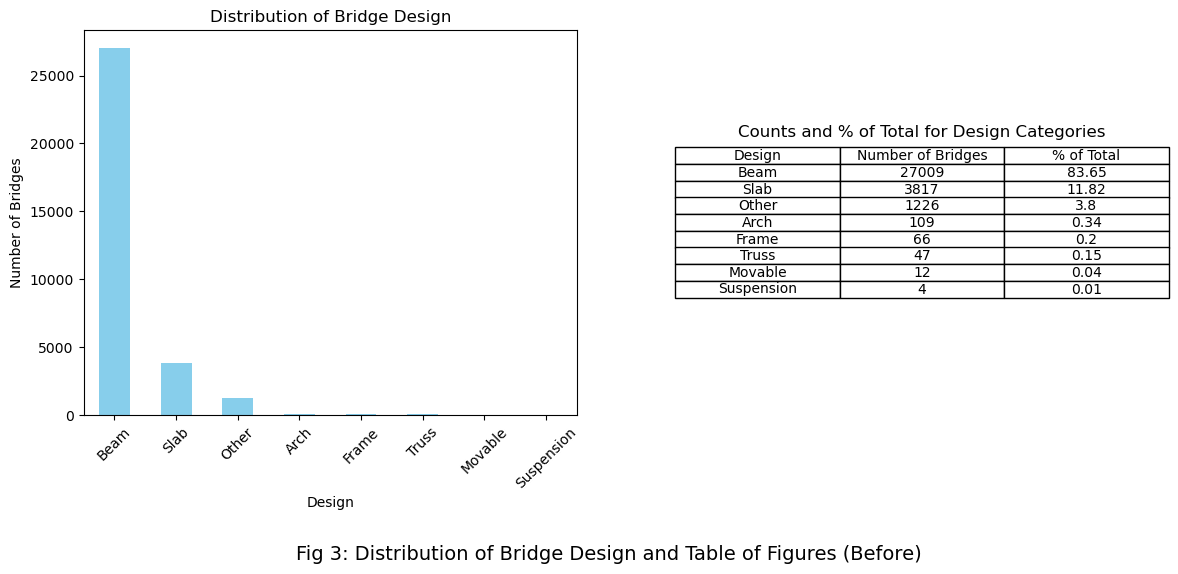

In [9]:
design_counts = TexasBridges['Design'].value_counts().reset_index()
design_counts.columns = ['Design', 'Number of Bridges']
total_bridges = len(TexasBridges)
design_counts['% of Total'] = round((design_counts['Number of Bridges'] / total_bridges) * 100,2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

TexasBridges['Design'].value_counts().plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Distribution of Bridge Design')
ax1.set_xlabel('Design')
ax1.set_ylabel('Number of Bridges')
ax1.tick_params(axis='x', rotation=45)

ax2.axis('off')
design_table = design_counts.copy()
ax2.set_title('Counts and % of Total for Design Categories', y=0.7)
ax2.table(cellText=design_table.values, colLabels=design_table.columns, cellLoc='center', loc='center')

plt.suptitle('Fig 3: Distribution of Bridge Design and Table of Figures (Before)', fontsize=14, y=-0.15)

plt.show()

These counts provide insights into the distribution of different bridge designs within the dataset.<br>
The data suggests that it is extremely imbalanced and Beam designs is the most prevalent, while the other designs are less common.

Thus, we would merge: Arch, Truss, Frame, Movable, Suspension and Other into one category Other, and we would keep the category for Slab. <br>
Then the new percentage of total bridges for category Other is 4.53% and the number of bridges with category Other are 1464. <br>
As such the new distribution of different categories for bridge design is, shown in Fig. 4.

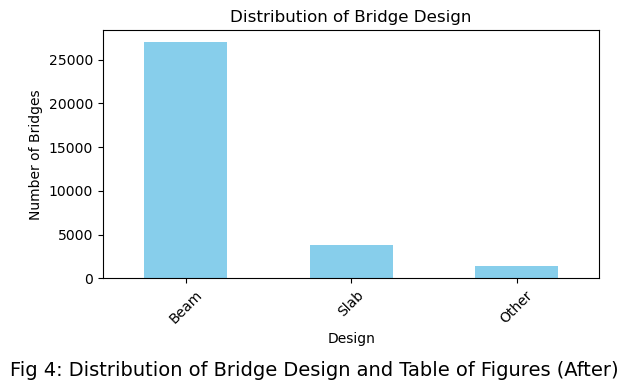

,Design,Number of Bridges,% of Total
0,Beam,27009,83.65
1,Slab,3817,11.82
2,Other,1464,4.53


In [10]:
replacement = { 'Frame': 'Other', 'Truss': 'Other', 'Arch': 'Other', 'Suspension': 'Other', 'Movable': 'Other' }
TexasBridges['Design'].replace(replacement, inplace=True)

plt.figure(figsize=(6, 4))
TexasBridges['Design'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Bridge Design')
plt.xlabel('Design')
plt.ylabel('Number of Bridges')
plt.xticks(rotation=45)
plt.suptitle('Fig 4: Distribution of Bridge Design and Table of Figures (After)', fontsize=14, y=0)
plt.tight_layout()
plt.show()


design_counts = TexasBridges['Design'].value_counts().reset_index()
design_counts.columns = ['Design', 'Number of Bridges']
total_bridges = len(TexasBridges)
design_counts['% of Total'] = round((design_counts['Number of Bridges'] / total_bridges) * 100,2)
design_counts

* **Material**

We have also been recommended to reduce the number of categories for bridge material by merging some of the very small categories. <br>
The variable Material could have the following values: Other, Concrete, Steel, Timber, Masonry. <br>
To better understand which values we could merge we create a bar chart to visualise the distribution of the Material variable. And a table that presents the number of bridges with a certain material and the respective percentage proportion of the total, both in Fig. 5.

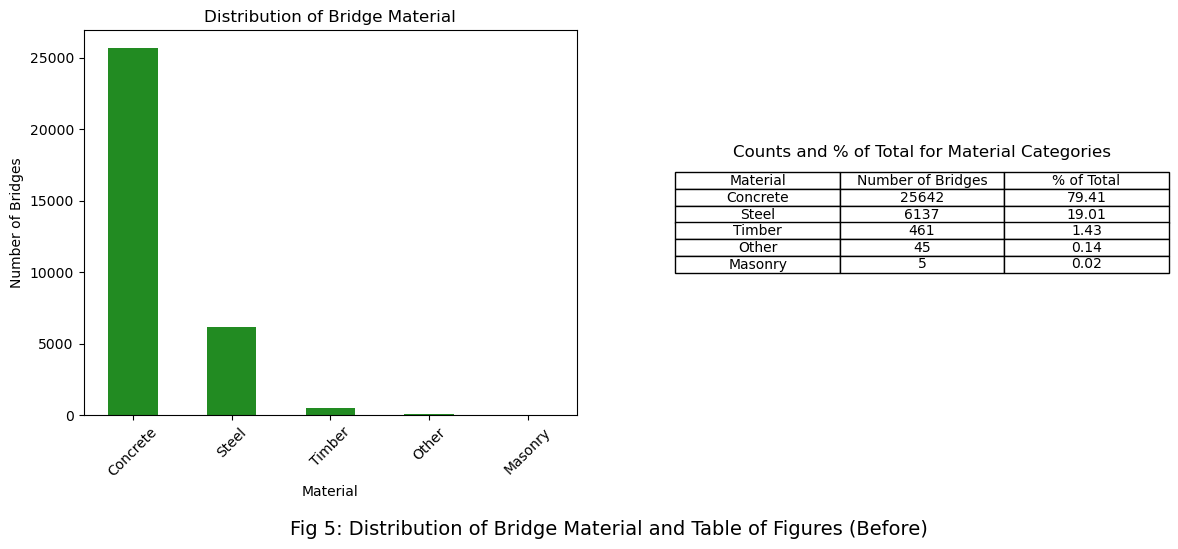

In [11]:
material_counts = TexasBridges['Material'].value_counts().reset_index()
material_counts.columns = ['Material', 'Number of Bridges']
total_bridges = len(TexasBridges)
material_counts['% of Total'] = round((material_counts['Number of Bridges'] / total_bridges) * 100,2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

TexasBridges['Material'].value_counts().plot(kind='bar', color='forestgreen', ax=ax1)
ax1.set_title('Distribution of Bridge Material')
ax1.set_xlabel('Material')
ax1.set_ylabel('Number of Bridges')
ax1.tick_params(axis='x', rotation=45)

ax2.axis('off')
material_table = material_counts.copy()
ax2.set_title('Counts and % of Total for Material Categories', y=0.65)
ax2.table(cellText=material_table.values, colLabels=material_table.columns, cellLoc='center', loc='center')

plt.suptitle('Fig 5: Distribution of Bridge Material and Table of Figures (Before)', fontsize=14, y=-0.1)
plt.show()

These counts provide insights into the distribution of different bridge materials within the dataset.<br>
The data suggests that it is extremely imbalanced and Concrete is the most prevalent material, while the other materials are less commonly used.<br>

Thus, we would merge: Timber, Masonry and Other into one category Other, and we would keep the category for Steel. <br>
This also aligns with our domain expert, who specialises in metal corrosion and the deterioration of concrete. <br>
Then, the new percentage of total bridges for category Other is 1.58%, and the number of bridges with category Other are 511. <br>
As such, the new distribution of different categories for bridge design is in Fig. 6.

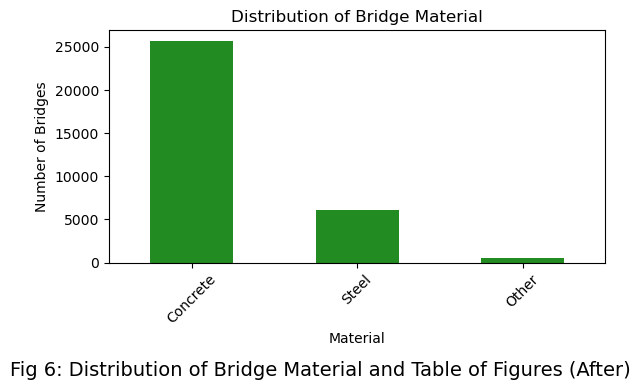

,Material,Number of Bridges,% of Total
0,Concrete,25642,79.41
1,Steel,6137,19.01
2,Other,511,1.58


In [12]:
replacement = { 'Timber': 'Other', 'Masonry': 'Other' }
TexasBridges['Material'].replace(replacement, inplace=True)

plt.figure(figsize=(6, 4))
TexasBridges['Material'].value_counts().plot(kind='bar', color='forestgreen')
plt.title('Distribution of Bridge Material')
plt.xlabel('Material')
plt.ylabel('Number of Bridges')
plt.xticks(rotation=45)
plt.suptitle('Fig 6: Distribution of Bridge Material and Table of Figures (After)', fontsize=14, y=0)
plt.tight_layout()
plt.show()

material_counts = TexasBridges['Material'].value_counts().reset_index()
material_counts.columns = ['Material', 'Number of Bridges']
total_bridges = len(TexasBridges)
material_counts['% of Total'] = round((material_counts['Number of Bridges'] / total_bridges) * 100,2)
material_counts

* **Current Condition**

The current condition is derived from the summation of the three main condition variables: 
1. Deck_rating
2. Superstr_rating
3. Substr_rating

In the current data frame, the variables are ordinal with rating values: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed. We would treat each rating as a score.<br>
Respectively: Excellent = 9, Very Good = 8, Good = 7, Satisfactory = 6, Fair = 5, Poor = 4 Serious = 3, Critical = 2, Failing = 1, Failed = 0.
<br>
**Assumption:** We would exlude bridges that have rating of NA as they do not provide fair representation of the current condition.

In [13]:
TexasBridges = TexasBridges[TexasBridges['Deck_rating'] != 'NA']
TexasBridges = TexasBridges[TexasBridges['Superstr_rating'] != 'NA']
TexasBridges = TexasBridges[TexasBridges['Substr_rating'] != 'NA']

#the below is to avoid the following error:ValueError: Unable to parse string "Good"
cat = { 'Failed': 0, 'Failing': 1, 'Critical': 2, 'Serious': 3, 'Poor': 4, 'Fair': 5,
        'Satisfactory': 6, 'Good': 7, 'Very Good': 8, 'Excellent': 9 }
TexasBridges['Deck_rating'].replace(cat, inplace=True)
TexasBridges['Superstr_rating'].replace(cat, inplace=True)
TexasBridges['Substr_rating'].replace(cat, inplace=True)

#change to numbers
TexasBridges['Deck_rating'] = pd.to_numeric(TexasBridges['Deck_rating'])
TexasBridges['Superstr_rating'] = pd.to_numeric(TexasBridges['Superstr_rating'])
TexasBridges['Substr_rating'] = pd.to_numeric(TexasBridges['Substr_rating'])

Now that all ratings scores are redefined as integers scores, we derive the new variable Current Condition as the summation of the following variables: Deck_rating, Superstr_rating and Substr_rating.

In [14]:
TexasBridges['Current Condition'] = TexasBridges['Deck_rating'] + TexasBridges['Superstr_rating'] + TexasBridges['Substr_rating']

Lastly, we only keep the variables that the management of the Texas Department of Transportation is interested in:
1. Age
2. Average use
3. Percent trucks
4. Material
5. Design
6. Current Condition

In [15]:
selected_var = ['Age', 'Average use', 'Percent trucks', 'Material', 'Design', 'Current Condition']
TexasBridges = TexasBridges[selected_var]
TexasBridges

,Age,Average use,Percent trucks,Material,Design,Current Condition
0,18,1,0.0,Concrete,Slab,23.0
1,18,1,0.0,Concrete,Slab,22.0
2,11,100,0.0,Concrete,Beam,24.0
3,73,80,0.0,Other,Beam,18.0
4,19,150,4.0,Concrete,Beam,23.0
...,...,...,...,...,...,...
34288,29,300,40.0,Concrete,Beam,21.0
34289,23,300,40.0,Concrete,Beam,21.0
34290,27,1200,25.0,Concrete,Beam,21.0
34291,32,300,15.0,Concrete,Beam,20.0


## Section 2: Exploratory Analysis

This section aims to explore the relationship between the five predictor variables and the target variable, as well as, the relationship between the predictors.

### Section 2.1 Relationship between predictor variables

The predictor variables are:
| Variable         |      Description             | Type | 
|:-----------------|:-----------------------------|:------:|
|Age               | The age of the bridge                                     | continuous | 
|Average use       | The average daily traffic (number of vehicles)            | continuous |
|Percent trucks    | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Material          | The dominant material the bridge is made from             | category |
|Design            | The design of the bridge                                  | category |


#### Section 2.1.1 Relationship between continuous variables


Firstly, we would explore the relationship between the continuous variables: Age, Average use and Percent trucks.<br>
The correlation coefficients are shown as a heat map and the scatter matrix is given in Fig 7.

C:\Users\desik\AppData\Local\Temp\ipykernel_27060\2534601474.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_matrix.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),


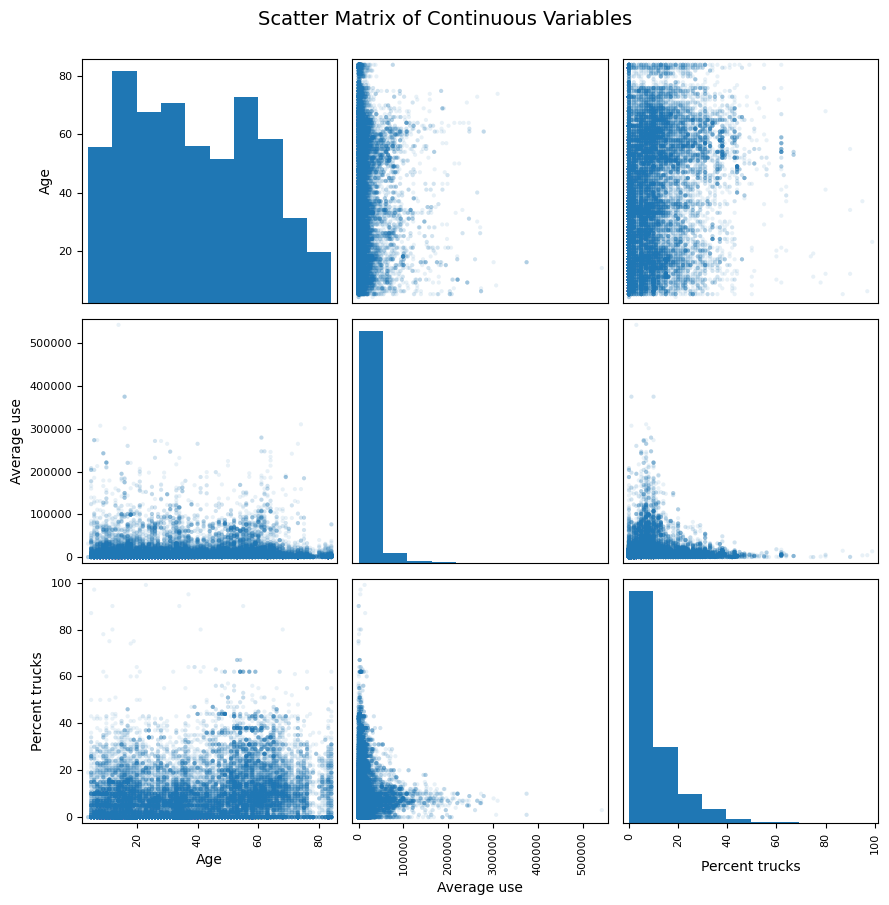

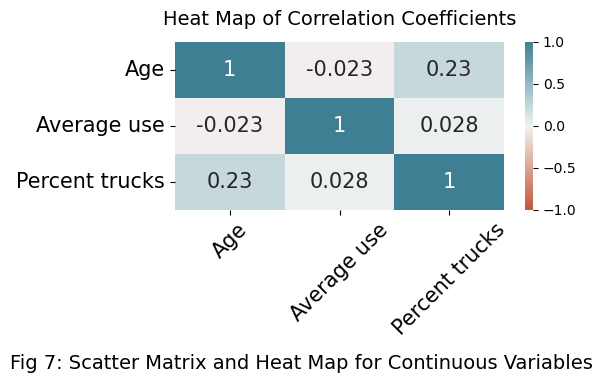

In [16]:
scatter_matrix = pd.plotting.scatter_matrix(TexasBridges.drop(columns=['Current Condition']), figsize=(9, 9), alpha =0.1)
plt.suptitle('Scatter Matrix of Continuous Variables', fontsize=14, y=1)
plt.tight_layout()

corr_matrix = TexasBridges.drop(columns=['Current Condition'])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.heatmap(corr_matrix.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
            annot=True, ax=ax, annot_kws={"size": 15})
plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.title('Heat Map of Correlation Coefficients', fontsize=14, y=1.05)
plt.suptitle('Fig 7: Scatter Matrix and Heat Map for Continuous Variables', fontsize=14, y=0)
plt.tight_layout()

plt.show()

**Observations:**

* **Age and Average use:**

The correlation coefficient between Age and Average use is approximately -0.023.
This value is close to 0, indicating a very weak negative correlation.
There is no strong linear relationship between the age of bridges and their average use.

* **Age and Percent Trucks:**

The correlation coefficient between Age and Percent trucks is approximately 0.23.
The positive value indicates a weak positive correlation.
It suggests that older bridges may see slightly more truck traffic.
However, due to the correlation coefficient, this correlation is considered relatively weak.

* **Average Use and Percent Trucks:**

The correlation coefficient between Average use and Percent trucks is approximately 0.028.
This value is close to 0, indicating a very weak positive correlation.
There is no significant linear relationship between Average use and Percent trucks.

The scatter matrix also suggests a weak degree of association as the plots are more spread-out.<br>
There are numerous outliers that significantly impact the interpretation between variables.<br>

It's important to note that correlation does not imply causation. <br>
Other factors or non-linear relationships may also influence these variables. <br>
As, correlation coefficients capture linear relationships, there could be other types of associations that are not reflected in these coefficients.<br>
Further analysis or domain knowledge may be required to understand the underlying factors affecting these variables.

#### Section 2.1.2 Relationship between categorical variables

Now, we would explore the relationship between the categorical variables: Material and Design.

* **Material and Design**

We design a bar chart to visualise the distribution of Material and Design categories and a cross tabulation table visualised with a heatmap in Fig 8.

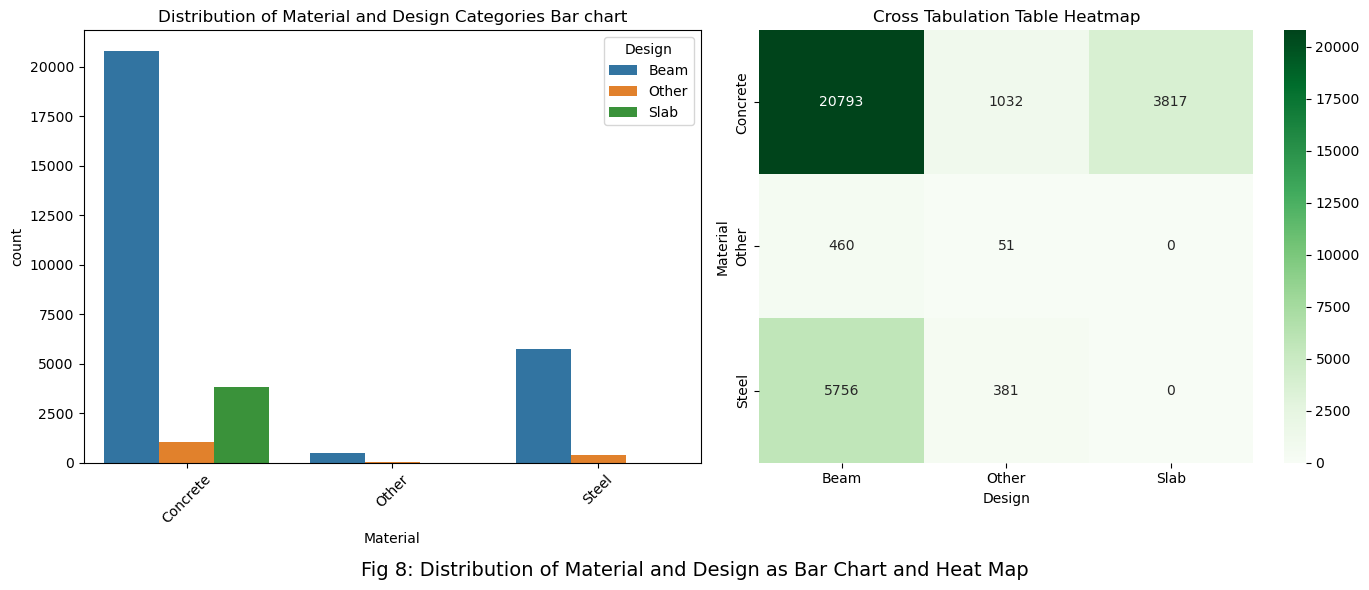

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=TexasBridges, x='Material', hue='Design', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title('Distribution of Material and Design Categories Bar chart')

c_table = pd.crosstab(TexasBridges['Material'], TexasBridges['Design'])

sns.heatmap(c_table, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_xlabel('Design')
axes[1].set_ylabel('Material')
axes[1].set_title('Cross Tabulation Table Heatmap')

plt.suptitle('Fig 8: Distribution of Material and Design as Bar Chart and Heat Map', fontsize=14, y=0)
plt.tight_layout()
plt.show()

**Observations:** <br>

The most commonnly used material amongst all designs is Concrete. <br>
All Slab designs are made with Concrete. <br>
As the information is limited, the domain expert might explore further analysis by performing the chi-square test to determine if there is a statistically significant association between Material and Design categories.
<br>
<br>

#### Section 2.1.3 Relationship between categorical and continuous variable 

Now, we would explore the relationship between the continuous and categorical variables:

* **Age and Material**

We explore the summary statistics for the Age variable grouped by Material visualised with a box plot in Fig. 9.

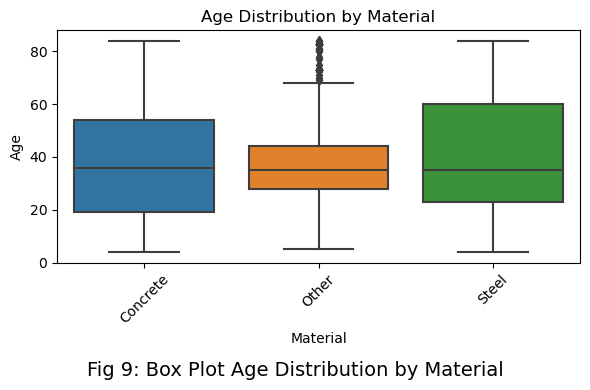

,count,mean,std,min,25%,50%,75%,max
Material,,,,,,,,
Concrete,25642.0,37.594766,20.399256,4.0,19.0,36.0,54.0,84.0
Other,511.0,38.643836,18.008886,5.0,28.0,35.0,44.0,84.0
Steel,6137.0,41.211015,21.625342,4.0,23.0,35.0,60.0,84.0


In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=TexasBridges, x='Material', y='Age')
plt.title('Age Distribution by Material')
plt.xlabel('Material')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.suptitle('Fig 9: Box Plot Age Distribution by Material', fontsize=14, y=0)
plt.tight_layout()
plt.show()

material_age_stats = TexasBridges.groupby('Material')['Age'].describe()
material_age_stats

**Observations:**

Steel bridges tend to be older on average compared to Concrete and Other bridges.<br>
The age distribution of Steel bridges is more variable, with a higher standard deviation.<br>
The majority of bridges, regardless of material, fall within the age range of 4 to 84 years. This is due to the exclusion of very old bridges.

* **Age and Design**

We explore the summary statistics for the Age variable grouped by Design visualised with a box plot in Fig. 10.

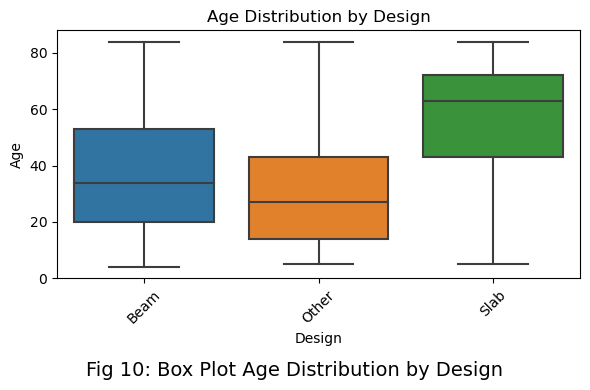

,count,mean,std,min,25%,50%,75%,max
Design,,,,,,,,
Beam,27009.0,36.411752,19.312684,4.0,20.0,34.0,53.0,84.0
Other,1464.0,30.387978,19.593225,5.0,14.0,27.0,43.0,84.0
Slab,3817.0,54.684569,22.442707,5.0,43.0,63.0,72.0,84.0


In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=TexasBridges, x='Design', y='Age')
plt.title('Age Distribution by Design')
plt.xlabel('Design')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.suptitle('Fig 10: Box Plot Age Distribution by Design', fontsize=14, y=0)
plt.tight_layout()
plt.show()

design_age_stats = TexasBridges.groupby('Design')['Age'].describe()
design_age_stats

**Observations:**

Slab design bridges tend to be older on average and have a wider age range.<br>
Other design bridges have a slightly lower average age.<br>
Beam' design bridges are in between, with a moderate average age.<br>

* **Average use and Material**

We explore the summary statistics for the Average use variable grouped by Material visualised by a histogram in Fig. 11.

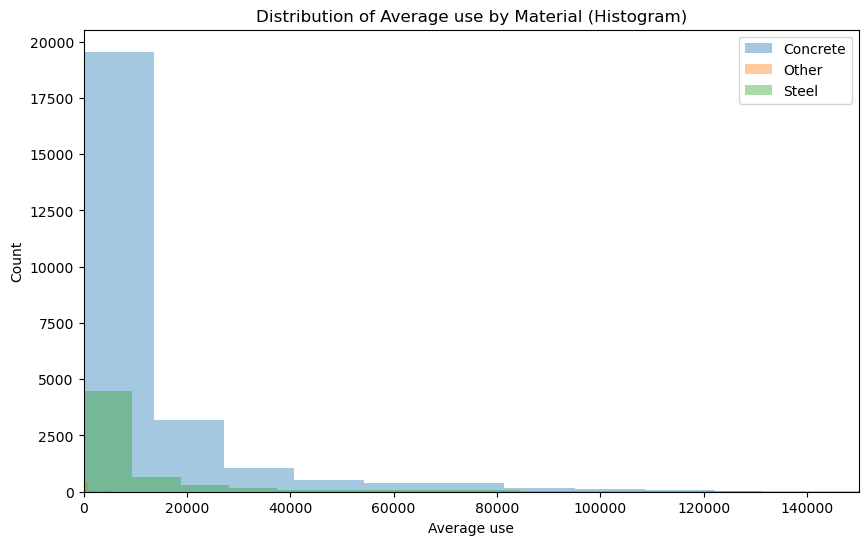

<Figure size 300x200 with 0 Axes>

,count,mean,std,min,25%,50%,75%,max
Material,,,,,,,,
Concrete,25642.0,12342.899462,24198.585479,0.0,670.0,4140.0,12757.5,543000.0
Other,511.0,906.268102,3468.021262,2.0,50.0,100.0,375.0,33500.0
Steel,6137.0,11811.719407,28112.402091,0.0,60.0,360.0,10510.0,375126.0


In [20]:
plt.figure(figsize=(10, 6))
for material in TexasBridges['Material'].unique():
    data = TexasBridges[TexasBridges['Material'] == material]['Average use']
    plt.hist(data, bins=40, alpha=0.4, label=material)

plt.title('Distribution of Average use by Material (Histogram)')
plt.xlabel('Average use')
plt.ylabel('Count')
plt.legend()
plt.xlim(0,150000)
plt.figure(figsize=(3, 2))
plt.suptitle('Fig 11: Distribution of Average use by Material', fontsize=14, y=0)
plt.tight_layout()
plt.show()

material_use_stats = TexasBridges.groupby('Material')['Average use'].describe()
material_use_stats

**Observations**:<br>

Concrete bridges have a wide average use range with some highly used bridges, while steel bridges have a somewhat similar distribution but with a lower average use. <br>
The distributions for Concrete and Steel are unimodal and right-skewed suggesting that possible extreme values are further to the left.

* **Average use and Design**

We explore the summary statistics for the Average use variable grouped by Design.

In [21]:
design_use_stats = TexasBridges.groupby('Design')['Average use'].describe()
design_use_stats

,count,mean,std,min,25%,50%,75%,max
Design,,,,,,,,
Beam,27009.0,13342.052834,26327.220441,1.0,403.0,4050.0,13960.0,543000.0
Other,1464.0,4273.768443,15636.031732,0.0,90.0,365.0,2665.0,187220.0
Slab,3817.0,5982.696096,12375.582510,1.0,320.0,1610.0,6980.0,203800.0


**Observations:**

Beam design has the highest mean value, suggesting it tends to have higher average use. <br>
Other design has a relatively low mean value, suggesting lower average use.<br>
Beam design exhibits a wide range of values, as indicated by the high standard deviation and the spread between the minimum and maximum.

* **Percent trucks and Material**

We explore the summary statistics for the Percent trucks variable grouped by Material and visualised by a histogram in Fig. 12.

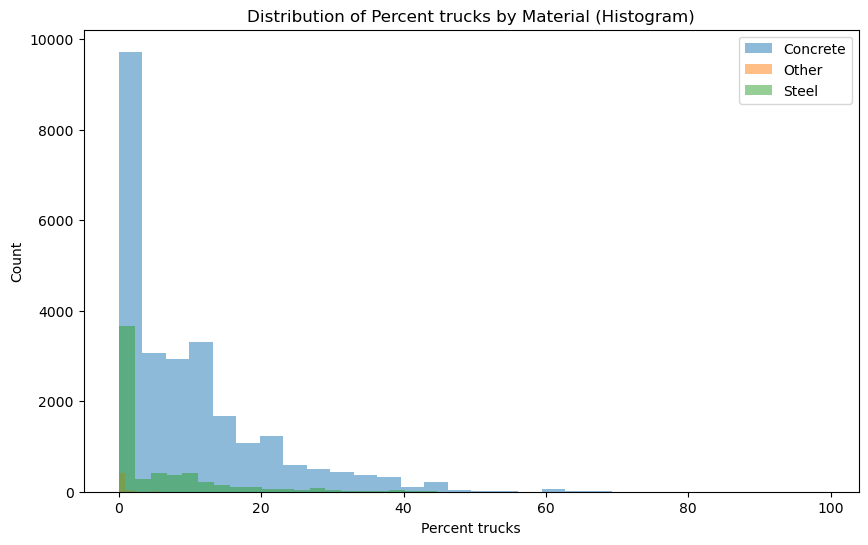

<Figure size 300x200 with 0 Axes>

,count,mean,std,min,25%,50%,75%,max
Material,,,,,,,,
Concrete,25642.0,9.365377,10.609916,0.0,0.0,7.0,14.0,99.0
Other,511.0,0.939335,2.970812,0.0,0.0,0.0,0.0,24.0
Steel,6137.0,5.127424,8.317881,0.0,0.0,0.0,8.0,67.0


In [22]:
plt.figure(figsize=(10, 6))
for material in TexasBridges['Material'].unique():
    data = TexasBridges[TexasBridges['Material'] == material]['Percent trucks']
    plt.hist(data, bins=30, alpha=0.5, label=material)

plt.title('Distribution of Percent trucks by Material (Histogram)')
plt.xlabel('Percent trucks')
plt.ylabel('Count')
plt.legend()
plt.figure(figsize=(3,2))
plt.suptitle('Fig 12: Distribution of Percent trucks by Material', fontsize=14, y=0)
plt.tight_layout()
plt.show()

material_truck_stats = TexasBridges.groupby('Material')['Percent trucks'].describe()
material_truck_stats

**Observations:**

Concrete bridges have a wider truck percentage range, while Other material bridges are relatively low truck percentage, and steel bridges have some variability in their range. <br>
75% Other material bridges have 0 percent truck trafic.<br>
50% Steal material bridges have 0 percent truck trafic.<br>
25% Concrete material bridges have 0 percent truck trafic.

* **Percent trucks and Design**

We explore the summary statistics for the Percent trucks variable grouped by Design and visualised by a histogram in Fig. 13.

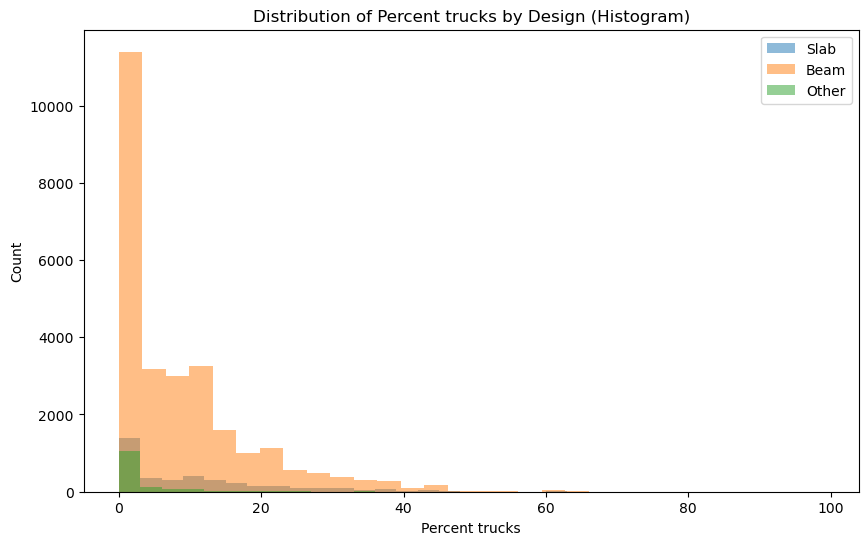

<Figure size 300x200 with 0 Axes>

,count,mean,std,min,25%,50%,75%,max
Design,,,,,,,,
Beam,27009.0,8.460994,10.208634,0.0,0.0,5.0,13.0,99.0
Other,1464.0,3.276639,7.009073,0.0,0.0,0.0,3.0,90.0
Slab,3817.0,10.158239,11.408216,0.0,0.0,7.0,16.0,90.0


In [23]:
plt.figure(figsize=(10, 6))
for material in TexasBridges['Design'].unique():
    data = TexasBridges[TexasBridges['Design'] == material]['Percent trucks']
    plt.hist(data, bins=30, alpha=0.5, label=material)

plt.title('Distribution of Percent trucks by Design (Histogram)')
plt.xlabel('Percent trucks')
plt.ylabel('Count')
plt.legend()
plt.figure(figsize=(3,2))
plt.suptitle('Fig 13: Distribution of Percent trucks by Design', fontsize=14, y=0)
plt.tight_layout()
plt.show()

design_truck_stats = TexasBridges.groupby('Design')['Percent trucks'].describe()
design_truck_stats

Based on the above we can observe that:<br>

Truck percentage varies across different design categories. <br>
50% Beam design bridges have less than 5 percent truck traffic.<br>
25% Beam design bridges have 0 percent truck trafic.<br>
50% Other design bridges 0 percent truck trafic.<br>
25% Slab design bridges have 0 percent truck trafic.

### Section 2.2 Relationship between a predictor variable and the target variable:

The predictor variables are:
| Variable         |      Description             | Type | 
|:-----------------|:-----------------------------|:------:|
|Age               | The age of the bridge                                     | continuous | 
|Average use       | The average daily traffic (number of vehicles)            | continuous |
|Percent trucks    | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Material          | The dominant material the bridge is made from             | category |
|Design            | The design of the bridge                                  | category |

The target variable is:
| Variable         |      Description             | Type | 
|:-----------------|:-----------------------------|:------:|
|Current Condition | The allocated score for current condition                 | continuous |


The correlation coefficients are shown as a heat map in Fig. 14.

C:\Users\desik\AppData\Local\Temp\ipykernel_27060\1504330797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(TexasBridges.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),


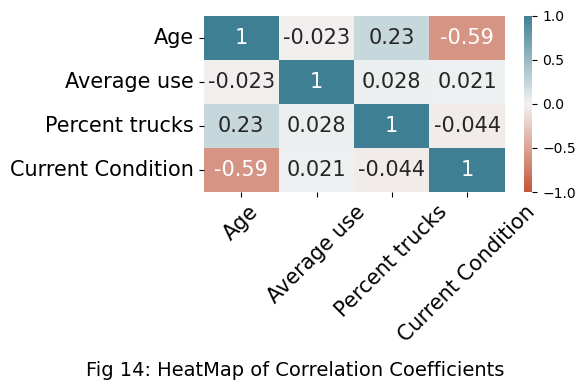

In [24]:
fig,ax = plt.subplots(1,1, figsize=(6,4))
sns.heatmap(TexasBridges.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)
plt.suptitle('Fig 14: HeatMap of Correlation Coefficients', fontsize=14, y=0)
plt.tight_layout()
plt.show()

The correlation coefficient matrix visualised by the heat map provides insights into the linear relationships between variables.

**Observations:**

* **Current Condition and Age**:

There is a moderate negative correlation between Current Condition and Age with a coefficient of approximately -0.59.<br>
This suggests that older bridges are more likely to be in poorer condition.

* **Current Condition and Average Use**:
There is a very weak positive correlation between Current Condition and Average Use with a coefficient of approximately 0.021.<br>
This suggests that there is a very slight tendency for bridges with higher average use to have slightly better current conditions. <br>
The coefficient might be too low to be considered significant.

* **Current Condition and Percent Trucks and Current Condition**:
There is a very weak negative correlation between Current Condition and Percent Trucks with a coefficient of approximately -0.044.<br>
This indicates a very slight tendency for bridges with a higher percentage of trucks to have slightly worse current conditions. <br>
The coefficient might be too low to be considered significant.

- The most significant finding is the negative correlation between Current Condition and Age.
- The other two weak correlations might be indicating that these variables have limited influence on the current condition of bridges.

It's important to note that correlation does not imply causation. <br>
Other factors or non-linear relationships may also influence these variables.<br>
As, correlation coefficients capture linear relationships, there could be other types of associations that are not reflected in these coefficients.<br>
Further analysis or domain knowledge may be required to understand the underlying factors affecting these variables.<br>

#### 2.2.1 Current Condition and Age

To further explore the relationship between Current Condition and Age we explore the summary statistics and visualise the data as a sctter plot with marginal histograms in Fig. 15.

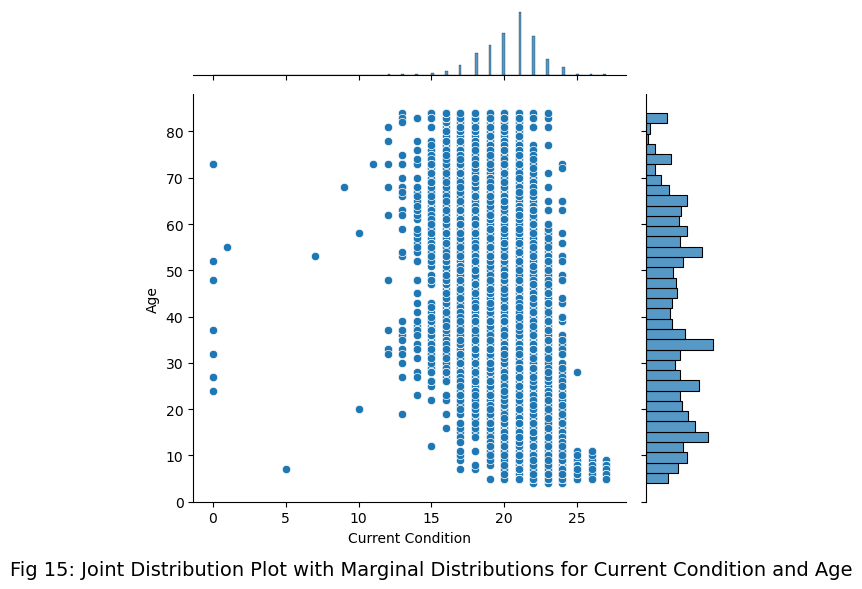

,count,mean,std,min,25%,50%,75%,max
Current Condition,,,,,,,,
0.0,9.0,43.666667,19.144190,24.0,27.0,37.0,52.00,73.0
1.0,1.0,55.000000,NaN,55.0,55.0,55.0,55.00,55.0
5.0,1.0,7.000000,NaN,7.0,7.0,7.0,7.00,7.0
7.0,1.0,53.000000,NaN,53.0,53.0,53.0,53.00,53.0
9.0,1.0,68.000000,NaN,68.0,68.0,68.0,68.00,68.0
10.0,2.0,39.000000,26.870058,20.0,29.5,39.0,48.50,58.0
11.0,1.0,73.000000,NaN,73.0,73.0,73.0,73.00,73.0
12.0,10.0,54.500000,20.040237,32.0,34.0,55.0,71.75,81.0
13.0,28.0,54.785714,19.655095,19.0,36.0,60.5,70.75,84.0


In [25]:
sns.jointplot(data=TexasBridges, x='Current Condition', y='Age', kind='scatter')
plt.suptitle('Fig 15: Joint Distribution Plot with Marginal Distributions for Current Condition and Age', fontsize=14, y=0)
plt.tight_layout()
plt.show()

con_age_stats = TexasBridges.groupby('Current Condition')['Age'].describe()
con_age_stats

**Observations:**

The range for Current Condition rating vary in size from 1 to 8594 bridges.<br>
Mean age for the range Current Condition rating exhibits differences in the average age of bridges. <br>
The standard deviation shows how much variation exists within each Current Condition rating. Groups with a larger standard deviation have more age variability among the bridges. <br>
The minimum and maximum ages provide insights into the age range within each rating. <br>
Outliers: Relatively old bridges with low rating could be plausible due to corrosion or deterioration. The majority of the bridges have Current Condition rating between 15 to 25. For instance, the Current Condition rating 7 could be considered an outlier as it has relatively high age 53, compared to other ratings. However, identifying outliers also requires domain knowledge and specific criteria for what is considered an outlier. In our context, it might be relevant to remove at first the ratings with Current Condition 0.


#### 2.2.2 Current Condition and Average use

To further explore the relationship between Current Condition and Average use we explore the summary statistics and visualise the data as a sctter plot with marginal histograms in Fig. 16.

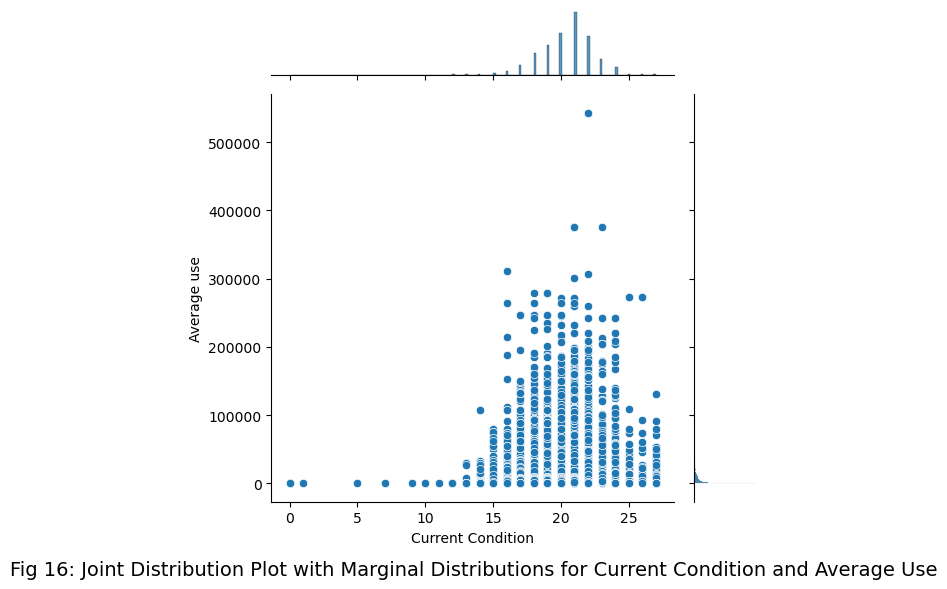

,count,mean,std,min,25%,50%,75%,max
Current Condition,,,,,,,,
0.0,9.0,66.666667,55.621489,10.0,50.0,55.0,70.00,195.0
1.0,1.0,210.000000,NaN,210.0,210.0,210.0,210.00,210.0
5.0,1.0,10.000000,NaN,10.0,10.0,10.0,10.00,10.0
7.0,1.0,50.000000,NaN,50.0,50.0,50.0,50.00,50.0
9.0,1.0,110.000000,NaN,110.0,110.0,110.0,110.00,110.0
10.0,2.0,30.000000,28.284271,10.0,20.0,30.0,40.00,50.0
11.0,1.0,80.000000,NaN,80.0,80.0,80.0,80.00,80.0
12.0,10.0,181.800000,208.364424,25.0,52.5,75.0,255.75,660.0
13.0,28.0,2576.607143,7357.455444,5.0,37.5,66.0,322.50,29352.0


In [26]:
sns.jointplot(data=TexasBridges, x='Current Condition', y='Average use', kind='scatter')
plt.suptitle('Fig 16: Joint Distribution Plot with Marginal Distributions for Current Condition and Average Use', fontsize=14, y=0)
plt.tight_layout()
plt.show()

con_use_stats = TexasBridges.groupby('Current Condition')['Average use'].describe()
con_use_stats

**Observations:**

In the Current Condition rating 0, there are 9 bridges with a mean Average use of approximately 66.67 and a wide standard deviation. <br>
Other Current Condition ratings have varying mean Average use values, standard deviations, and distributions. <br>

Current Condtition ratings in the range 18 to 23 have relatively large counts and varying means and standard deviations. <br>
Current Condition rating with the highest mean Average use is 25, but it also has a widest standard deviation. <br>
Some Current Condition ratings have missing standard deviation values because they have only one bridge. <br>

Outliers: The majority of the bridges have Current Condition rating between 15 to 25. Extremely high maximum values for Average use could be extreme outliers. Extremely low Average use could be an outlier but it is highly possible due to the Current Condition of the bridge. For instance, the Current Condition rating 5 could be considered an outlier as it has relatively low average use 10, compared to other ratings. However, identifying outliers also requires domain knowledge and specific criteria for what is considered an outlier.  In our context, it might be relevant to remove at first the ratings with Current Condition 0.

#### 2.2.3 Current Condition and Percent trucks

To further explore the relationship between Current Condition and Percent trucks we explore the summary statistics and visualise the data as a sctter plot with marginal histograms in Fig. 17.

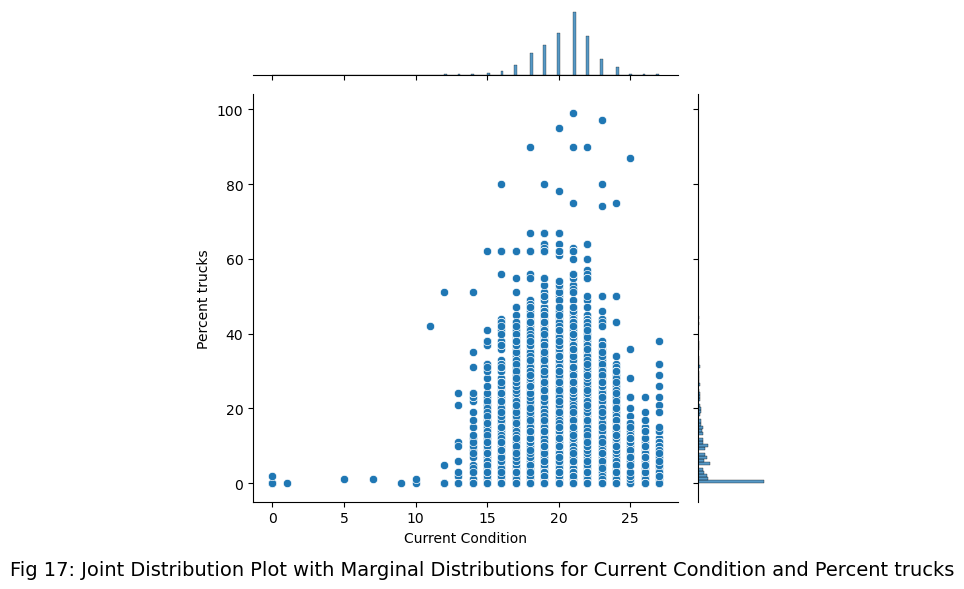

,count,mean,std,min,25%,50%,75%,max
Current Condition,,,,,,,,
0.0,9.0,0.222222,0.666667,0.0,0.00,0.0,0.00,2.0
1.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
5.0,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
7.0,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
9.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
10.0,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
11.0,1.0,42.000000,NaN,42.0,42.00,42.0,42.00,42.0
12.0,10.0,5.600000,16.029140,0.0,0.00,0.0,0.00,51.0
13.0,28.0,2.821429,6.289636,0.0,0.00,0.0,2.00,24.0


In [27]:
sns.jointplot(data=TexasBridges, x='Current Condition', y='Percent trucks', kind='scatter')
plt.suptitle('Fig 17: Joint Distribution Plot with Marginal Distributions for Current Condition and Percent trucks', fontsize=14, y=0)
plt.tight_layout()
plt.show()

con_truck_stats = TexasBridges.groupby('Current Condition')['Percent trucks'].describe()
con_truck_stats

**Observations:**

The mean percentage truck traffic varies significantly across different Current Condition ratings from.<br>
The standard deviation in percentage truck traffic is more pronounced in some Current Condition ratings than in others. It indicates varying degrees of variability in traffic truck percentages.<br>
Some Current Condition ratings have missing standard deviation values because they have only one bridge. <br>
Outliers: The majority of the bridges have Current Condition rating between 15 to 25. Extremely high maximum values for traffic truck percentage could be extreme outliers but it could be possible due to the location of the bridge. For instance, the Current Condition rating 11 could be considered an outlier as it has relatively high max, compared to other ratings. However, identifying outliers also requires domain knowledge and specific criteria for what is considered an outlier. In our context, it might be relevant to remove at first the ratings with Current Condition 0.


#### 2.2.4 Current Condition and Material

To explore the relationship between Current Condition and Material we explore we explore the summary statistics and visualise the data as a box plot and a histogram in Fig. 18.

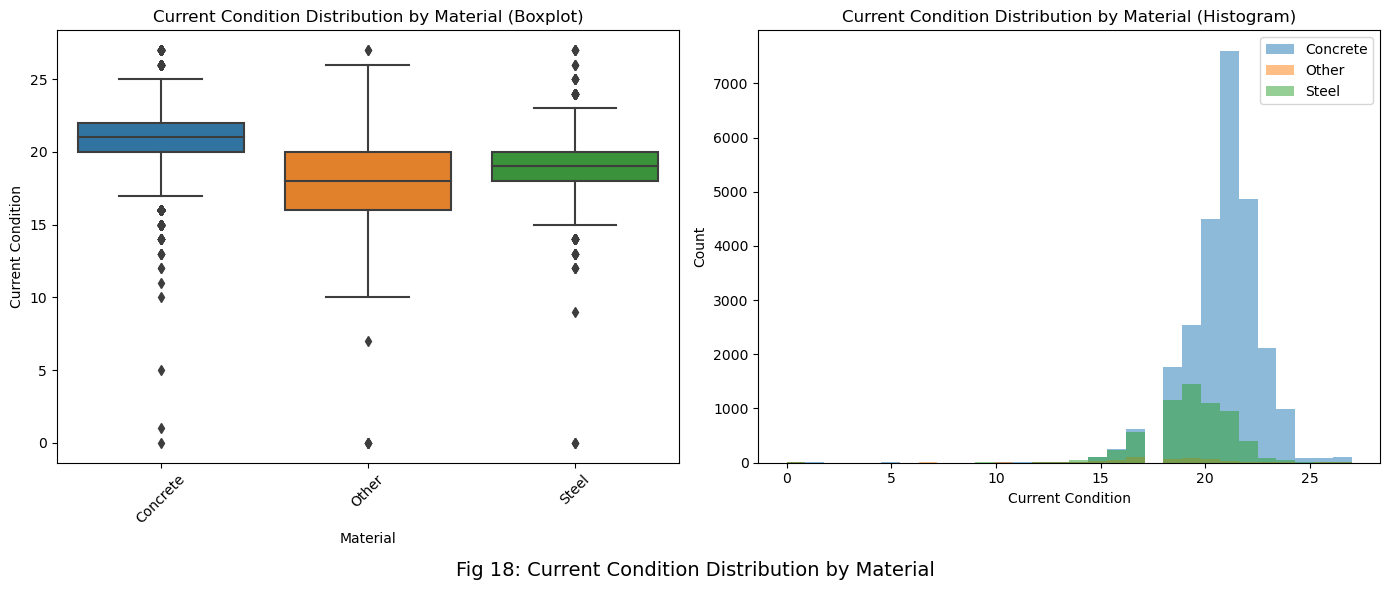

,count,mean,std,min,25%,50%,75%,max
Material,,,,,,,,
Concrete,25637.0,20.762804,1.776002,0.0,20.0,21.0,22.0,27.0
Other,511.0,17.855186,3.035504,0.0,16.0,18.0,20.0,27.0
Steel,6135.0,19.181418,1.853410,0.0,18.0,19.0,20.0,27.0


In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=TexasBridges, x='Material', y='Current Condition', ax=axes[0])
axes[0].set_title('Current Condition Distribution by Material (Boxplot)')
axes[0].set_xlabel('Material')
axes[0].set_ylabel('Current Condition')
axes[0].tick_params(axis='x', rotation=45)

for material in TexasBridges['Material'].unique():
    data = TexasBridges[TexasBridges['Material'] == material]['Current Condition']
    axes[1].hist(data, bins=30, alpha=0.5, label=material)

axes[1].set_title('Current Condition Distribution by Material (Histogram)')
axes[1].set_xlabel('Current Condition')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.suptitle('Fig 18: Current Condition Distribution by Material', fontsize=14, y=0)
plt.tight_layout()
plt.show()

con_mat_stats = TexasBridges.groupby('Material')['Current Condition'].describe()
con_mat_stats

**Observations:**

The mean Current Condition rating is the highest for Concrete bridges is approximately 20.76. <br>
The standard deviation is relatively low, indicating that Current Condition ratings for Concrete bridges are clustered around the mean. <br>

The mean Current Condition rating for Steel bridges is approximately 19.18. <br>
The standard deviation is relatively low, indicating that Current Condition ratings for Steel bridges are also clustered around the mean. <br>

It that the Current Condition varies slightly between different materials. <br>
On average, Concrete bridges tend to have the highest Current Condition ratings, followed by Steel bridges and Other materials.<br>
Outliers: The presence of a maximum of 27 and minimum of 0 across all three materials suggests that there may be outliers. Outliers might indicate exceptional cases where the Current Condition rating significantly exceeds the typical range, possibly due to measurement errors, unique situations, or exceptionally well-maintained bridges. Further investigation or domain knowledge is required to understand these outliers. In our context, it might be relevant to remove at first the ratings with Current Condition 0.


#### 2.2.5 Current Condition and Design

To explore the relationship between Current Condition and Design we visualise the data as a box plot and a histogram in Fig. 19.

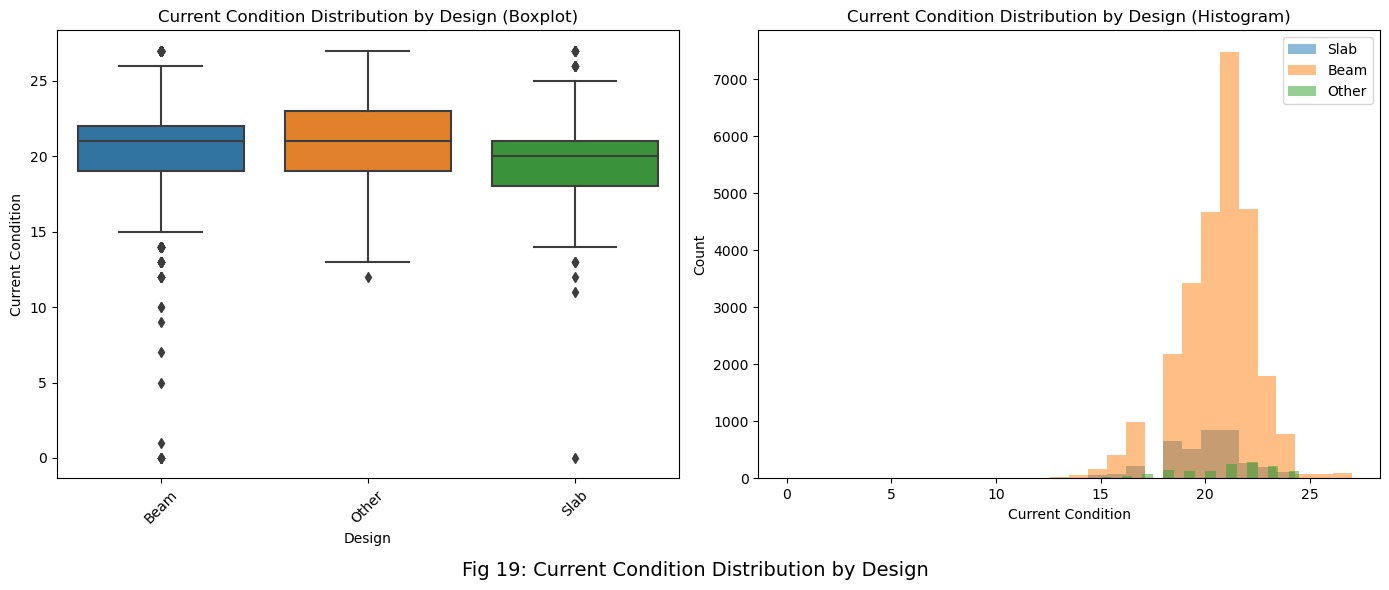

,count,mean,std,min,25%,50%,75%,max
Design,,,,,,,,
Beam,27007.0,20.475210,1.903928,0.0,19.0,21.0,22.0,27.0
Other,1459.0,20.757368,2.384234,12.0,19.0,21.0,23.0,27.0
Slab,3817.0,19.868745,1.971046,0.0,18.0,20.0,21.0,27.0


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=TexasBridges, x='Design', y='Current Condition', ax=axes[0])
axes[0].set_title('Current Condition Distribution by Design (Boxplot)')
axes[0].set_xlabel('Design')
axes[0].set_ylabel('Current Condition')
axes[0].tick_params(axis='x', rotation=45)

for material in TexasBridges['Design'].unique():
    data = TexasBridges[TexasBridges['Design'] == material]['Current Condition']
    axes[1].hist(data, bins=30, alpha=0.5, label=material)

axes[1].set_title('Current Condition Distribution by Design (Histogram)')
axes[1].set_xlabel('Current Condition')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.suptitle('Fig 19: Current Condition Distribution by Design', fontsize=14, y=0)
plt.tight_layout()
plt.show()

con_des_stats = TexasBridges.groupby('Design')['Current Condition'].describe()
con_des_stats

Based on the above we can observe that:

Bridges with Beam design have the highest mean design across all Current Condition ratings, while bridges with Other design have the overall highest mean design out of the three groups.

Outliers: The presence of a maximum 27 and a minimum of 0 across the Beam and Slab designs suggests that there may be outliers. These ratings may represent data entry errors or anomalies and the presence of such outliers should be further investigated and, if necessary, addressed in the data.  In our context, it might be relevant to remove at first the ratings with Current Condition 0.

### Section 2.3: Preliminary conclusions

* The observations for variable Age suggests that the variable is a good fit for predictive variable
* Average use, Percent trucks might not be good fit for Current Condition
* Percent trucks would be have more influence than Average use over the target.
* Age might have the most influence over the predictive variable
* The outliers that we would consider extreme are the Current Condition Ratings 0.

## Section 3: Regression Modelling

This section aims to construct a linear regression to look at the effect of the five predictor variables: Age, Average use and Percent trucks, Material and Design, on the target variable: Current Condition.

### Section 3.1: Preparation

- The theory of regression - in particular that the best regression line minimises the square of the errors - assumes that the dependent variable has a normal distribution.

- There is no assumption that the predictor (independent) variables are normally distributed.
There is a high degree of skew among those variables: both Average use and Percent trucks are right skewed.

- The predictor variables are not co-linear.

- The categorical variables must be transformed using reference encoding.

- for categorical variable Design the reference variable is Beam

- for categorical variable Material the reference variable is Concrete

In [30]:
TBridges = TexasBridges.copy

#This is to avoid the space error in column name
TBridges = TexasBridges.rename(columns={'Average use': 'AverageUse', 'Percent trucks': 'PercentTrucks', 'Current Condition': 'CurrentCondition'})

# this is to remove the error y contains NaN
TBridges = TBridges.dropna(subset=['Age', 'AverageUse', 'PercentTrucks', 'CurrentCondition'])

dum_des = pd.get_dummies(TBridges.Design, drop_first=True)
dum_mat = pd.get_dummies(TBridges.Material, drop_first=True)

### Section 3.2 Fitting the Regression Line

To fit a linear regression, we need to get the predictor data in the right format.<br>
Then we create and fit the linear regresion model and then we obtain and print the model's statistics.

In [31]:
X = TBridges[['Age', 'AverageUse', 'PercentTrucks']]
X = np.column_stack((TBridges.Age, TBridges.AverageUse, TBridges.PercentTrucks, 
                     dum_des.Slab, dum_des.Other,
                     dum_mat.Steel, dum_mat.Other
                     ))

y = TBridges['CurrentCondition']

reg = LinearRegression().fit(X, y)

r_squared = reg.score(X, y)
intercept = reg.intercept_

coefficients = reg.coef_

print(f'The R^2 coefficient of determination is {r_squared:.3f}')
print(f'The intercept is {intercept:.1f}')
print(f'Estimated regression coefficients are respectively:')
print(f'Age: {coefficients[0]:.2f}')
print(f'Average use: {coefficients[1]:.2f}')
print(f'Percent trucks: {coefficients[2]:.2f}')
print(f'Design Slab: {coefficients[3]:.2f}')
print(f'Design Other: {coefficients[4]:.2f}')
print(f'Material Steel: {coefficients[5]:.2f}')
print(f'Material Other: {coefficients[6]:.2f}')

The R^2 coefficient of determination is 0.453
The intercept is 22.8
Estimated regression coefficients are respectively:
Age: -0.05
Average use: -0.00
Percent trucks: 0.01
Design Slab: 0.04
Design Other: 0.10
Material Steel: -1.36
Material Other: -2.80


### Section 3.3 Interpretation of results

The **R-squared value** is 0.453.

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (Current Condition) that is explained by the independent variables (Age, Average use, Percent trucks) in the linear regression model.<br>
Thus, 45.3% of the variance in the Current Condition is explained by the model.<br>
The remaining 54.7% of the variance is not explained by the model.<br>
A higher R-squared value usually indicates a better fit of the model to the data.

The **intercept** (22.8) represents the estimated Current Condition value when all the independent variables are zero.<br>

Estimated Regression Coefficients:

These coefficients represent the effect of each independent variable on the dependent variable while holding all other variables constant.

The coefficients quantify the impact of each predictor on the target variable.

**Age**
A one-year increase in age is associated with a decrease of 0.05 in the Current Condition. <br>
As bridges get older, the condition deteriorates.

**Average use**
A one-unit increase in average use is associated with a decrease of 0.00 in the Current Condition.<br>
One vehiecle extra daily, does not affect the Current Condition. <br>
This variable doesn't seem to have a strong impact on the target variable.

**Percent trucks**
A one-unit increase in the percentage of trucks is associated with an increase of 0.01 in the Current Condition.<br>
More traffic from trucks on a bridge is associated with a slightly better Current Condition.

**Design Slab**
Bridges with Beam design tend to have an increase of 0.04 in the Current Condition compared to the reference category Beam.<br>
This coefficient indicates the impact of having a Slab design on the Current Ccondition.

**Design Other**
Bridges with a Other designs tend to have an increase of 0.1 in the Current Condition compared to the reference category Beam. <br>
This coefficient indicates the impact of having a Slab design on the Current Ccondition.

**Material Steel**
Bridges from steel material are associated with a decrese of 1.36 units in Current Condition compared to the reference category Concrete.<br>

**Material Other**
Bridges from other materials are associated with a decrese of 2.80 units in Current Condition compared to the reference category Concrete.<br>

It's important to notify the domain expert that while R-squared provides a measure of the model's fit to the data.
Thus, a higher the R-squared doesn not imply causation. <br>
Similarly, a lower R-squared doesn't imply a bad model. There might be influence by factors not included in the model.

### Section 3.4 Distribution of Residuals

Residuals are the differences between the actual observed values and the predicted values from the regression model.

We first calculate the errors (residuals) and then show their distribution as a histogram in Fig. 20 and a scatter plot that shows the actual values against the predicted values in Fig, 21:

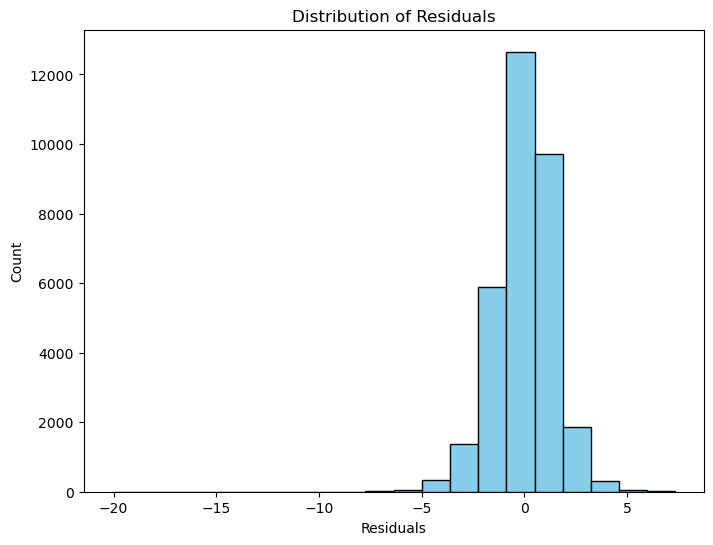

<Figure size 300x200 with 0 Axes>

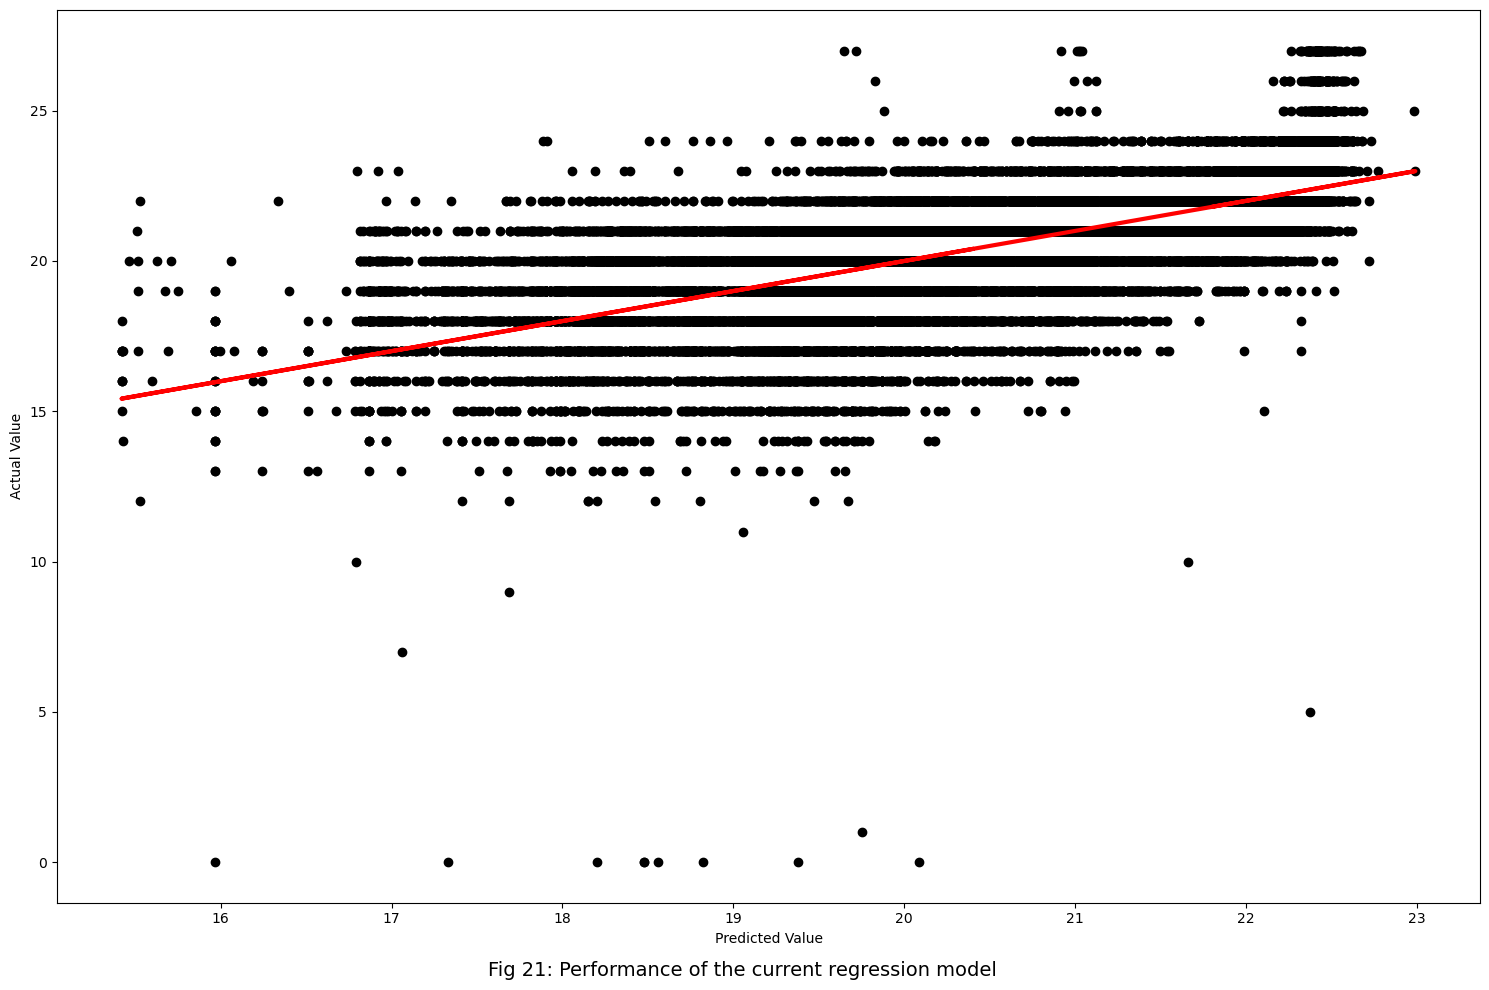

In [32]:
predicted_values = reg.predict(X)
residuals = y - predicted_values

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.figure(figsize=(3,2))
plt.suptitle('Fig 20: Distribution of Residuals', fontsize=14, y=0)
plt.tight_layout()
plt.show()

fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(predicted_values, y,  color='black')
a.plot(predicted_values, predicted_values, color='red', linewidth=3)
a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')
plt.suptitle('Fig 21: Performance of the current regression model ', fontsize=14, y=0)
plt.tight_layout()
plt.show()

**Observations:**

- The residuals are centered around 0 and have a roughly symmetrical distribution.
- A well-distributed pattern usually indicates that the linear regression model is a good fit for the data.
- Fig. 21 does not indicate a good fit as the observations are not clustered around the predictive line.
- The proposed model does not accuretely predict the actual values of Current Condition.

### Section 3.4 Standartisation and Influence Comparisson for Predictors

The differing ranges of the predictors variables make the $\beta$ regression coefficients hard to compare.

To make camparison easier, we use the `StandardScaler class` from the `scikit-learn (sklearn) library`. The StandardScaler is used to scale and center (standardise) the features, making them have a mean of 0 and a standard deviation of 1. This process is also known as z-score scaling.

This would standertise our values and make comparison easier.

In [33]:
Z = StandardScaler().fit_transform(X)

reg1 = LinearRegression().fit(Z, y)

coefficients1 = reg1.coef_

print(f'Estimated regression coefficients for standartised:')
print(f'Age: {coefficients1[0]:.2f}')
print(f'Average use: {coefficients1[1]:.2f}')
print(f'Percent trucks: {coefficients1[2]:.2f}')
print(f'Design Slab: {coefficients1[3]:.2f}')
print(f'Design Other: {coefficients1[4]:.2f}')
print(f'Material Steel: {coefficients1[5]:.2f}')
print(f'Material Other: {coefficients1[6]:.2f}')

Estimated regression coefficients for standartised:
Age: -1.13
Average use: -0.01
Percent trucks: 0.06
Design Slab: 0.01
Design Other: 0.02
Material Steel: -0.53
Material Other: -0.35


The most influential predictive variables can be determined by examining the absolute values of the standartised reggression coefficients.

The variable with the largest absolute value is Age with a standardised coefficient of -1.13. Therefore, Age is the most influential predictive variable.

A standardised coefficient represents the change in the dependent variable Current Condition (in standard deviations) for a one-standard-deviation change in the independent variable.

The next most influential predictive variables are Steel Material with a standartised coefficient of -0.53 and Other Material with a standartised coefficient of -0.35.

The rest of the standartised coefficients could be considered to have relatively insignificant impact on the target variable.

### Section 3.5 Conclusion

1. How well the proposed variables can predict the bridge condition?

The R-squared value of 0.453 indicates that approximately 45.3% of the variance in the target variable (current condition) can be explained by the independent variables (Age, Average use, Percent trucks, Design, and Material) in the regression model. <br>
The R-squared value suggests that these variables collectively explain about 45.3% of the variance in bridge current condition. <br>
The proposed variables collectively provide some predictive power, but there is still a significant amount (more than half) of unexplained variance in the current condition that is not captured by the model.<br>
Thus, we consider that the proposed variables do not predict well the bridge condition.

2. Which of the proposed variables has more influence on the current condition?

The regression coefficients indicate the direction and magnitude of influence, with Age having the most significant influence.

### Section 3.6 Further Analysis

We calculate the RMSE, to use it as a guide to check whether our model is a relatively good fit.

RMSE stands for Root Mean Squared Error. It is commonly used metric to evaluate the accuracy of a predictive models, in our context the linear reggresion model. RMSE measures the average magnitude of the errors (the differences between predicted and actual values) in a way that gives larger errors more weight.

To calculate RMSE:
 - calculate the residuals
 - square the residuals - to ensure that positive and negative values do not cancel each other out
 - calculate the mean - of the residuals
 - take the square root

RMSE is expressed in the same units as the target variable, making it interpretable in the context of the problem you're trying to solve. 

Lower RMSE indicates a better fit of the model to the data.
It is sensitive to outliers as the errors are weigthed.

In [34]:
rmse = np.sqrt(((residuals) ** 2).mean())
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 1.44


Now, let's discuss the RMSE of 1.44.

RMSE is a measure of the model's prediction accuracy, and it represents the standard deviation of the model's prediction errors.
In our context, an RMSE of 1.44 indicates that, on average, the model's predictions are off by approximately 1.44 units with respect to the Current Condition. Moreover, an RMSE of 1.44 suggests that the model's predictions have a standard deviation of 1.44 units away from the actual Current Condition values.

A lower RMSE is generally desirable, as it indicates that the model's predictions are closer to the actual values, more acurate.
Ultimately, the acceptability of an RMSE value is a subjective decision based on the specific context and is important to balance prediction accuracy with the practicality of implementing and maintaining the model.

**Considerations**

- Consult domain experts to determine an acceptable level of  error for bridge condition predictions and consider the domain-specific knowledge and stanadrds.

- Evaluate the goals of the regression model. If the requirement is to produce accurate predictions, a lower PMSE is desired, if the model needs to describe rough estimates then an RMSE of 1.44 could be acceptable.

- Consider the intended application of the model. Is the impact negligible? Are the predictions used for critical decisions or safety assessment? Or do the predictions have an informational or construction-planning purposess, where a slightly higher RMSE is acceptable.

- Consider non-linear models. Linear regression assumes a linear relationship between predictors and the target variable, but the relationship might not be linear.

- A larger and more diverse dataset can improve model performance. 

- Could comparissons to existing models be made? Is the model meeting the existing standards?

- Perform a sensitivity analysis to determine the practical significance of error.

- Better outlier detection to prevent the outliers adversely affecting the model's performance.

**Suggestions for further analysis**

- Feature Selection - Feature selection methods to identify the most important features for predicting the target variable can remove irrelevant features, simplify the model and improve its performance.

- Feature Engineering - Creating new features might capture more complex relationships in the data.

- Model Selection - Consider using different regression models or techniques, compare their performance and choose the one that provides the best fit to the data.

- Ensemble Methods - Consider using ensemble methods such as random forests to combine multiple models and improve predictive accuracy.